In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


In [8]:
def preprocess(array):
    array=array.astype("float32")/255.0
    array=np.reshape(array,(len(array),28,28,1))
    return array
                            
                            

In [16]:
def noise(array):
    noise_factor=0.9
    noisy_array=array+np.random.normal(loc=0.0,scale=1.0,size=array.shape)
    
    return np.clip(noisy_array,0.0,1.0)

In [17]:
def display(array1,array2):
    n=10
    
    indices=np.random.randint(len(array1),size=n)
    images1=array1[indices,:]
    images2=array2[indices,:]
    
    plt.figure(figsize=(20,4))
    for i, (images1,images2) in enumerate(zip(images1, images2)):
        ax=plt.subplot(2,n,i+1)
        plt.imshow(images1.reshape(28,28))
        plt.gray()
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax=plt.subplot(2,n,i+1+n)
        plt.imshow(images2.reshape(28,28))
        plt.gray()
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

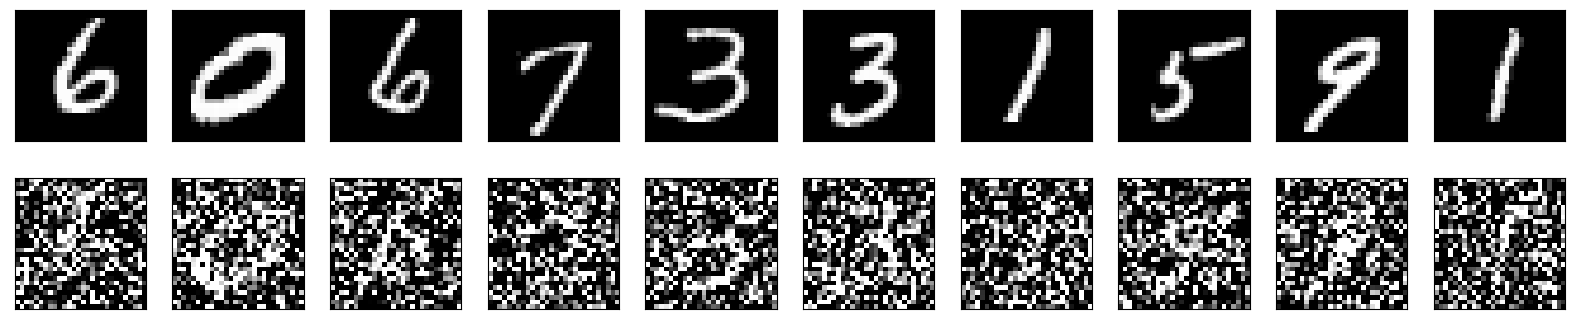

In [18]:
(train_data,_),(test_data,_)=mnist.load_data()

train_data=preprocess(train_data)
test_data=preprocess(test_data)

noisy_train_data=noise(train_data)
noisy_test_data=noise(test_data)

display(train_data,noisy_train_data)

In [19]:
input=layers.Input(shape=(28,28,1))

x=layers.Conv2D(32,(3,3), activation="relu",padding="same")(input)
x=layers.MaxPooling2D((2,2),padding="same")(x)
x=layers.Conv2D(32,(3,3), activation="relu",padding="same")(x)
x=layers.MaxPooling2D((2,2),padding="same")(x)


x=layers.Conv2DTranspose(32,(3,3), strides=2,activation="relu",padding="same")(x)
x=layers.Conv2DTranspose(32,(3,3), strides=2,activation="relu",padding="same")(x)
x=layers.Conv2D(1,(3,3), activation="sigmoid",padding="same")(x)


autoencoder=Model(input,x)
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

autoencoder.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248  

In [21]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    
    epochs=20,
    
    batch_size=128,
    shuffle=True,
    validation_data=(test_data,test_data),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


2024-03-04 08:55:13.438611: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcuda.so.1
2024-03-04 08:55:13.494734: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1674] Found device 0 with properties: 
name: NVIDIA A100-SXM4-40GB MIG 1g.5gb major: 8 minor: 0 memoryClockRate(GHz): 1.41
pciBusID: 0000:0f:00.0
2024-03-04 08:55:13.494777: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcudart.so.12
2024-03-04 08:55:13.515417: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcublas.so.12
2024-03-04 08:55:13.516833: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcufft.so.11
2024-03-04 08:55:13.517038: I tensorflow/stream_executor/platform/default/dso_loader.cc:50] Successfully opened dynamic library libcurand.so.10
2024-03-04 08:55:13.519062: I tensorflow/stream_executor/pl

60000/60000 [==============================] - 14s 234us/sample - loss: 0.1361 - val_loss: 0.0752
Epoch 2/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0731 - val_loss: 0.0706
Epoch 3/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0702 - val_loss: 0.0688
Epoch 4/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0688 - val_loss: 0.0680
Epoch 5/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0679 - val_loss: 0.0671
Epoch 6/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0673 - val_loss: 0.0666
Epoch 7/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0668 - val_loss: 0.0662
Epoch 8/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0664 - val_loss: 0.0658
Epoch 9/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0661 - val_loss: 0.0655
Epoch 10/20
60000/60000 [=====================

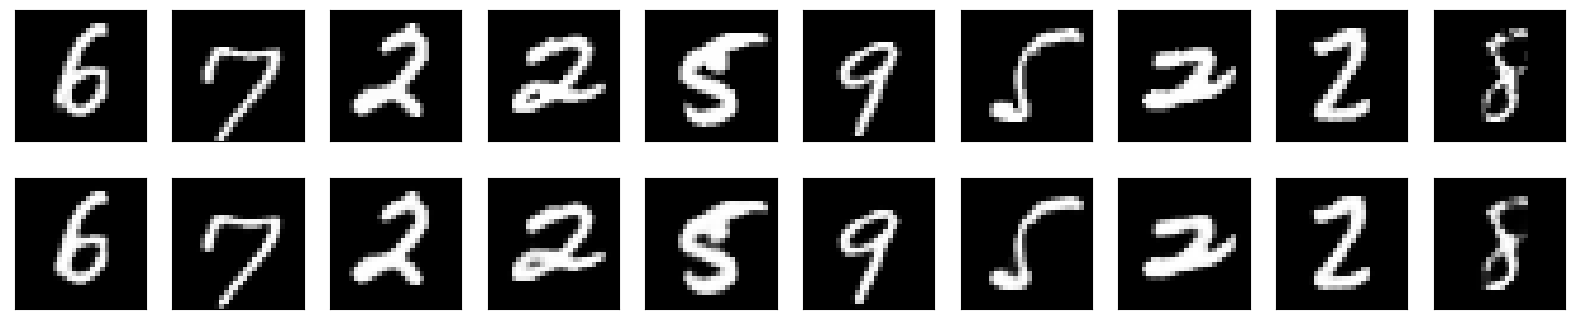

In [22]:
predictions= autoencoder.predict(test_data)

display(test_data,predictions)

In [23]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    
    epochs=30,
    
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data,test_data),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2004 - val_loss: 0.1867
Epoch 2/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1859 - val_loss: 0.1838
Epoch 3/30
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1831 - val_loss: 0.1805
Epoch 4/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1810 - val_loss: 0.1787
Epoch 5/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1795 - val_loss: 0.1779
Epoch 6/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1783 - val_loss: 0.1767
Epoch 7/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1773 - val_loss: 0.1758
Epoch 8/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1765 - val_loss: 0.1751
Epoch 9/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1758 - val_

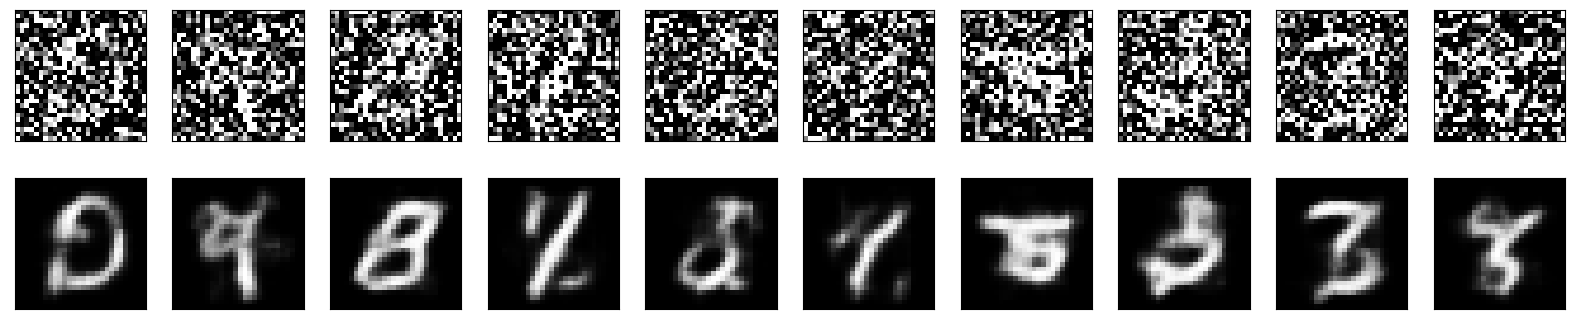

In [24]:
predictions= autoencoder.predict(noisy_test_data)

display(noisy_test_data,predictions)